In [23]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("imports-85.DATA", header = None) #header = None if we don't specify the parameters of each colm
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
          "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
          "num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
          "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.replace("?", np.nan, inplace = True)
df["price"] =  df["price"].astype("float")
df['horsepower'] = df['horsepower'].astype("float")
df.dropna(subset=["price"],axis=0,inplace=True)
df.dropna(subset=["horsepower"],axis=0,inplace=True)

Linear regression depends of one variable to make a decision while multiple depends on multiple independent variables.
SLR -> Predictor(independent) x, Target(dependent) y
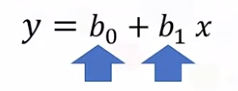

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x = df[['highway-mpg']] #why double brackets? 2D?
y = df['price']

lm.fit(x,y)
Ythat = lm.predict(x)

bo = lm.intercept_
b1 = lm.coef_
price = bo + b1*x

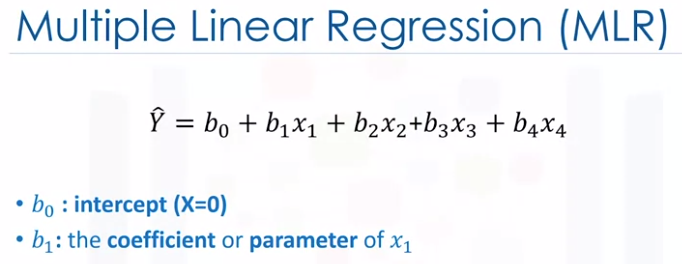

In [33]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

bo = lm.intercept_
b1 = lm.coef_
Ythat = lm.predict(Z)
#calculate the price

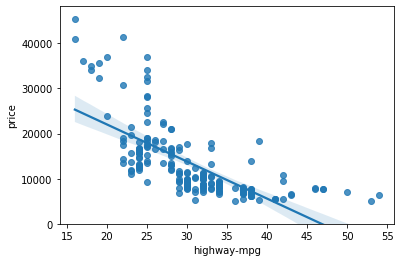

In [30]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.show()

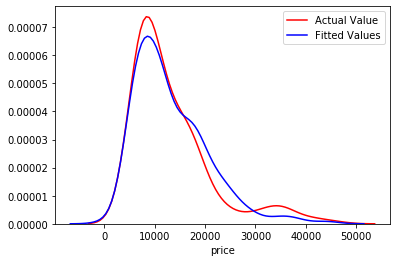

In [35]:
ax1 = sns.distplot(df['price'],hist=False,color='r',label="Actual Value")
sns.distplot(Ythat ,hist=False,color='b',label="Fitted Values", ax= ax1)

Polynomial Regressions, a special case of the general linear regression model. Usefull for describing curvilinear relationships

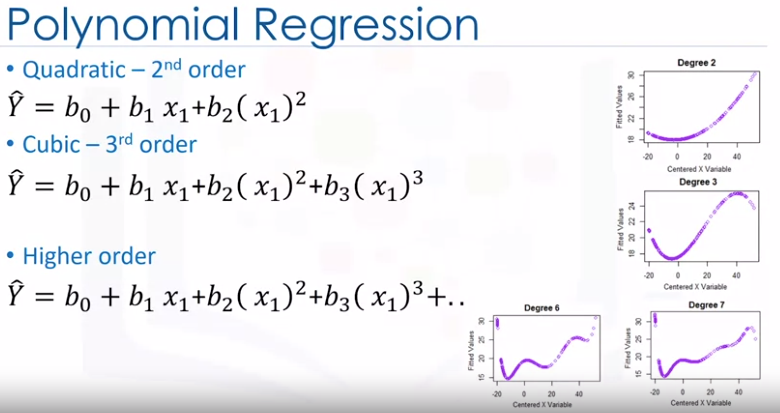

In [40]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.553 x + 204.3 x - 8948 x + 1.377e+05


In [41]:
#Mean Squared Error (MSE), allow us to check the error of the price and the predicted.
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'],Ythat) #where Ythat are the predicted values.


31837842.499262143

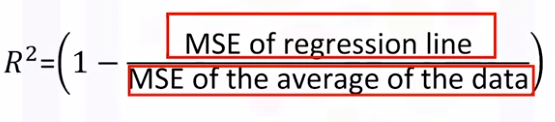

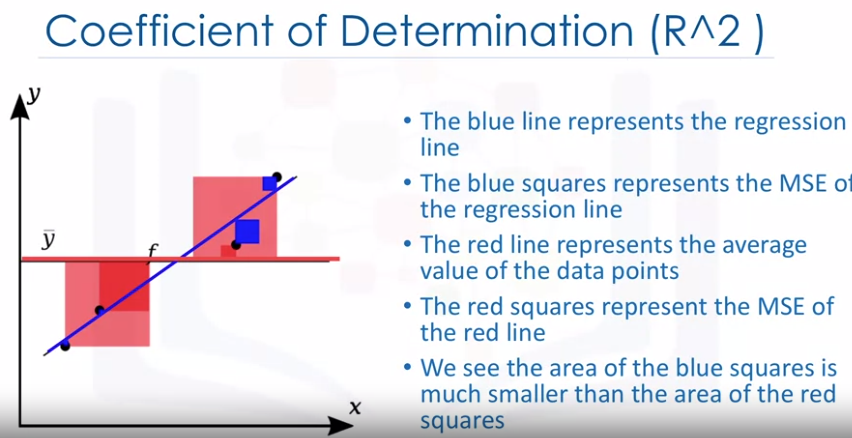

So if we get a value close to 1 it means that the line is a good fit for the data.
Below There is an exampel of a bad prediction

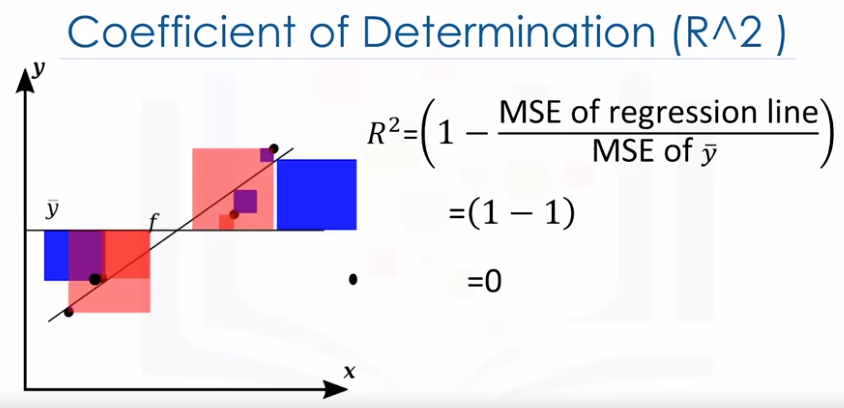

In [44]:
#We can calculate R^2 as follows:
x = df[['highway-mpg']]
y = df['price']

lm.fit(x,y)
print(lm.score(x,y)) #The 49% of the variation of price its explained by this simple linear model

#if r^2 its negative it could be due to overfitting

0.497349156029669


<h2>TO SUM UP</h2> 

In [55]:
#first we train the model
lm.fit(df[['highway-mpg']],df['price'])

#Let's predict the price of a car with 30 highway-mpg
price = lm.predict(np.array(30.0).reshape(-1,1))
print("Predicted price: "+str(price))
print("Price = "+str(lm.intercept_)+""+str(lm.coef_)+"*highway-mpg")

Predicted price: [13804.86252368]
Price = 38450.00418821089[-821.50472215]*highway-mpg


If we get non-sense data could because we haven't data in the range we are asking.

In [58]:
new_input = np.arange(1, 100, 1).reshape(-1, 1) #values of x (highway-mpg) that we want to predict
yhat = lm.predict(new_input)
print(yhat)

[ 37628.49946606  36806.99474391  35985.49002176  35163.98529961
  34342.48057746  33520.9758553   32699.47113315  31877.966411
  31056.46168885  30234.9569667   29413.45224455  28591.9475224
  27770.44280025  26948.9380781   26127.43335595  25305.92863379
  24484.42391164  23662.91918949  22841.41446734  22019.90974519
  21198.40502304  20376.90030089  19555.39557874  18733.89085659
  17912.38613444  17090.88141229  16269.37669013  15447.87196798
  14626.36724583  13804.86252368  12983.35780153  12161.85307938
  11340.34835723  10518.84363508   9697.33891293   8875.83419078
   8054.32946862   7232.82474647   6411.32002432   5589.81530217
   4768.31058002   3946.80585787   3125.30113572   2303.79641357
   1482.29169142    660.78696927   -160.71775289   -982.22247504
  -1803.72719719  -2625.23191934  -3446.73664149  -4268.24136364
  -5089.74608579  -5911.25080794  -6732.75553009  -7554.26025224
  -8375.7649744   -9197.26969655 -10018.7744187  -10840.27914085
 -11661.783863   -12483.2885

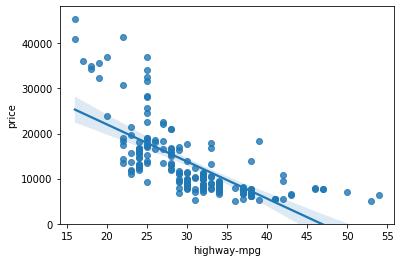

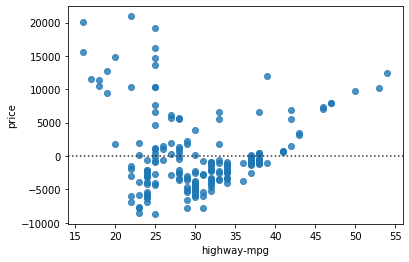

In [62]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.show()

sns.residplot(df['highway-mpg'], df['price'])
plt.show()

The data trends down as the value of the dependent variable increases, analising he residual plot we se a curve suggesting no linear behaviour. So we look at the visualization plot of the results obtained

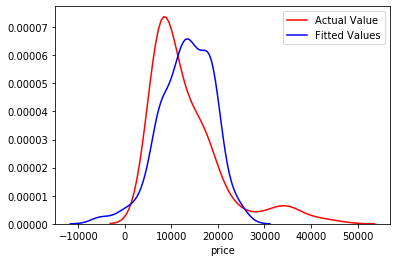

In [64]:
ax1 = sns.distplot(df['price'],hist=False,color='r',label="Actual Value")
sns.distplot(Ythat ,hist=False,color='b',label="Fitted Values", ax= ax1)
plt.show()

We can see that the predicted values from range 30000-40000 are inaccurate, so this suggests that non linear model would be more suitable or we need more data.
Now we can check r^2 error and see which percentage can be described as a linear relation

In [65]:
print(lm.score(x,y))

0.497349156029669
